In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

In [2]:
#todas as turmas de 2013 até 2017
turma_periodo = ['dados/turmas-2013.1.csv','dados/turmas-2013.2.csv','dados/turmas-2014.1.csv','dados/turmas-2014.2.csv','dados/turmas-2015.1.csv',
                 'dados/turmas-2015.2.csv','dados/turmas-2016.1.csv', 'dados/turmas-2016.2.csv', 'dados/turmas-2017.1.csv', 'dados/turmas-2017.2.csv',]


In [3]:
#le todos os dados de todos os arquivos e salva em uma conjunto de datasets
frames = [pd.read_csv(periodo, sep=';', usecols=['id_turma','id_componente_curricular', 'ano', 'nivel_ensino', 'periodo','situacao_turma']) for periodo in turma_periodo]


In [4]:
#concatena os data sets
df_turmas = pd.concat(frames)
df_turmas.head()

,id_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma
0,1196178,50280.0,LATO SENSU,2013,1.0,CONSOLIDADA
1,1196210,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA
2,1196211,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA
3,1196212,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA
4,1196213,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA


In [5]:
# filtrar apenas disciplinas com código "CONSOLIDADA"
df_turmas_consolidadas = df_turmas[df_turmas.situacao_turma == 'CONSOLIDADA']
df_turmas_consolidadas.dropna(inplace=True)
df_turmas_consolidadas.head()

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma
0,1196178,50280.0,LATO SENSU,2013,1.0,CONSOLIDADA
1,1196210,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA
2,1196211,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA
3,1196212,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA
4,1196213,52540.0,TÉCNICO,2013,1.0,CONSOLIDADA


In [6]:
#muda o nome da coluna do componente e muda o tipo para int64 - para fazer o merge com as disciplinas
df_turmas_consolidadas.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
df_turmas_consolidadas.id_componente = df_turmas_consolidadas.id_componente.astype(np.int64)

C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
#armazena os dados das disciplinas
disciplinas_url = 'dados/componentes-curriculares-presenciais.csv'
df_disciplinas = pd.read_csv(disciplinas_url, sep=';',usecols=["id_componente","codigo","nome"])
df_disciplinas.dropna(inplace=True)
df_disciplinas.head()

,id_componente,codigo,nome
0,18643,MUT508,COMPOSIÇÃO EM MÚSICA POPULAR III
1,18644,MUT516,CO-REPETIÇÃO
2,18645,MUT520,CONTRABAIXO ACÚSTICO I
3,18646,MUT165,PIANO COMPLEMENTAR I
4,18647,MUT167,PIANO COMPLEMENTAR III


In [8]:
#filtra apenas as disciplinas do imd
disciplinas_imd = df_disciplinas[df_disciplinas.codigo.str.contains("IMD")]
disciplinas_imd.id_componente = disciplinas_imd.id_componente.astype(np.int64)
disciplinas_imd.head()

C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,id_componente,codigo,nome
20970,51954,IMD0001,INOVAÇÃO TECNOLÓGICA
21229,52247,IMD0002,INOVAÇÃO TECNOLÓGICA
21230,52248,IMD0003,PROCESSO E QUALIDADE DE SOFTWARE
21231,52249,IMD0004,GERÊNCIA DE PROJETOS
21371,52390,IMD0005,INOVAÇÃO TECNOLÓGICA


In [9]:
#merge entre turmas e disciplinas
colunas = ["id_turma","id_componente","codigo","nome","nivel_ensino","ano","periodo","situacao_turma"]
turmas_disciplinas = pd.merge(df_turmas_consolidadas, disciplinas_imd , on='id_componente')[colunas]
turmas_disciplinas = turmas_disciplinas[~turmas_disciplinas.id_turma.duplicated()]
turmas_disciplinas.head()

,id_turma,id_componente,codigo,nome,nivel_ensino,ano,periodo,situacao_turma
0,1196210,52540,IMD0901,INTRODUÇÃO ÀS TECNOLOGIAS DA INFORMAÇÃO,TÉCNICO,2013,1.0,CONSOLIDADA
1,1196211,52540,IMD0901,INTRODUÇÃO ÀS TECNOLOGIAS DA INFORMAÇÃO,TÉCNICO,2013,1.0,CONSOLIDADA
2,1196212,52540,IMD0901,INTRODUÇÃO ÀS TECNOLOGIAS DA INFORMAÇÃO,TÉCNICO,2013,1.0,CONSOLIDADA
3,1196213,52540,IMD0901,INTRODUÇÃO ÀS TECNOLOGIAS DA INFORMAÇÃO,TÉCNICO,2013,1.0,CONSOLIDADA
4,1196214,52540,IMD0901,INTRODUÇÃO ÀS TECNOLOGIAS DA INFORMAÇÃO,TÉCNICO,2013,1.0,CONSOLIDADA


In [10]:
# armazena as avaliações dos professores da ufrn
avaliacao = pd.read_csv("dados/avaliacaodocencia.csv", sep=';')
avaliacao.head()

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
0,15370,FERNANDO MOREIRA DA SILVA,1209923,2013,2,14,9.17,1.34,8.13,2.70,7.61,2.53
1,15370,FERNANDO MOREIRA DA SILVA,1222008,2014,1,15,9.44,0.92,7.17,3.08,8.71,1.72
2,15370,FERNANDO MOREIRA DA SILVA,1222218,2014,1,38,9.19,1.67,6.77,3.29,8.12,2.53
3,15370,FERNANDO MOREIRA DA SILVA,1229520,2014,2,13,9.06,1.16,7.68,2.51,7.62,2.77
4,15370,FERNANDO MOREIRA DA SILVA,1229545,2014,2,24,9.27,1.28,8.45,1.72,8.48,1.86


In [11]:
colunas = ["id_turma","id_componente","codigo","nome","nivel_ensino","nome_docente","ano_y","postura_profissional_media","postura_profissional_DP","atuacao_profissional_media","atuacao_profissional_DP","autoavaliacao_aluno_media","autoavaliacao_aluno_DP"]
av_imd = pd.merge(turmas_disciplinas, avaliacao, on='id_turma')[colunas]
av_imd.head()

,id_turma,id_componente,codigo,nome,nivel_ensino,nome_docente,ano_y,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
0,1210347,52656,IMD0014,INTRODUÇÃO AO CÁLCULO,GRADUAÇÃO,SAMYR SILVA BEZERRA JACOME,2013,9.19,2.02,8.51,2.53,7.48,2.63
1,1211547,52656,IMD0014,INTRODUÇÃO AO CÁLCULO,GRADUAÇÃO,SAMYR SILVA BEZERRA JACOME,2013,9.72,0.66,8.82,2.09,7.96,2.61
2,1210362,52651,IMD0012.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,GRADUAÇÃO,ADJA FERREIRA DE ANDRADE,2013,9.08,1.44,7.35,3.02,8.73,2.19
3,1211551,52651,IMD0012.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,GRADUAÇÃO,ADJA FERREIRA DE ANDRADE,2013,9.63,0.87,8.70,2.18,8.07,2.72
4,1217933,52651,IMD0012.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,GRADUAÇÃO,ANDRE MAURICIO CUNHA CAMPOS,2014,9.69,0.60,8.92,1.37,8.61,1.81


In [12]:
lista_prof = av_imd.nome_docente.unique()
lista_prof.sort()

In [13]:
lista_disciplinas = av_imd.nome.unique()
lista_disciplinas.sort()

In [14]:
from __future__ import print_function
from ipywidgets import interact

def evolucao(x):
    dados_prof = av_imd.loc[av_imd['nome_docente'] == x]
    return (dados_prof)

interact(evolucao, x=lista_prof,);

interactive(children=(Dropdown(description='x', options=('ADJA FERREIRA DE ANDRADE', 'ALUIZIO FERREIRA DA ROCHA NETO', 'ALYSON MATHEUS DE CARVALHO SOUZA', 'ANDERSON PAIVA CRUZ', 'ANDRE LUIZ DA SILVA SOLINO', 'ANDRE LUIZ DE SOUZA BRITO', 'ANDRE MAURICIO CUNHA CAMPOS', 'ANNE MAGALY DE PAULA CANUTO', 'ANTONIO IGOR SILVA DE OLIVEIRA', 'ANTONIO WALLACE ANTUNES SOARES', 'ATHANASIOS TSOUANAS', 'AUGUSTO JORGE DE MACEDO', 'BRUNO SANTANA DA SILVA', 'CARLA DA COSTA FERNANDES CURVELO', 'CARLOS AUGUSTO PROLO', 'CARLOS EDUARDO DA SILVA', 'CESAR RENNO COSTA', 'CHARLES ANDRYE GALVAO MADEIRA', 'DANIEL SABINO AMORIM DE ARAUJO', 'DANIEL TEIXEIRA DOS SANTOS', 'DANILO CURVELO DE SOUZA', 'DAVID BORIS PAUL DEHARBE', 'DENNYS LEITE MAIA', 'DIOMADSON RODRIGUES BELFORT', 'EDGARD DE FARIA CORREA', 'EDUARDO NOGUEIRA CUNHA', 'EIJI ADACHI MEDEIROS BARBOSA', 'ELIZABETH FERREIRA GOUVEA GOLDBARG', 'ELLIS MARIA SOUZA NORO', 'EMERSON MOURA DE ALENCAR', 'ERNANO ARRAIS JUNIOR', 'EUGENIO PACCELLI AGUIAR FREIRE', 'EVERTON RANIELLY DE SOUSA CAVALCANTE', 'FERNANDA PALHANO XAVIER DE FONTES', 'FRANCISCO GEOCI DA SILVA', 'FREDERICO ARAUJO DA SILVA LOPES', 'GILIARD FAUSTINO DA SILVA', 'GUSTAVO GIRAO BARRETO DA SILVA', 'HADLEY MAGNO DA COSTA SIQUEIRA', 'HANDERSON BEZERRA MEDEIROS', 'HANIEL MOREIRA BARBOSA', 'IRIS LINHARES PIMENTA', 'ISAAC FRANCO FERNANDES', 'ISABEL DILLMANN NUNES', 'ITAMIR DE MORAIS BARROCA FILHO', 'IVANOVITCH MEDEIROS DANTAS DA SILVA', 'JOAO BATISTA DA COSTA JUNIOR', 'JOAO CARLOS XAVIER JUNIOR', 'JOAO MARCOS DE ALMEIDA', 'JORGE ESTEFANO SANTANA DE SOUZA', 'JOSUÉ VITOR DE MEDEIROS JÚNIOR', 'JULIANA DE MELO PEREIRA', 'JULIO CESAR PAULINO DE MELO', 'KAYO GONCALVES E SILVA', 'KLEBER TAVARES FERNANDES', 'LEONARDO CESAR TEONACIO BEZERRA', 'LILIANE RIBEIRO DA SILVA', 'LORENA AZEVEDO DE SOUSA', 'LOURENA KARIN DE MEDEIROS ROCHA', 'LUCELIO DANTAS DE AQUINO', 'LUCIANA VIEIRA ANDRADE', 'MANOEL VERAS DE SOUSA NETO', 'MARCIA JACYNTHA NUNES RODRIGUES LUCENA', 'MARCIO EDUARDO KREUTZ', 'MARJORY CRISTIANY DA COSTA ABREU', 'MONICA MAGALHAES PEREIRA', 'NELSON ION DE OLIVEIRA', 'PATRICK CESAR ALVES TERREMATTE', 'PAULO ROBERTO BELTRAO MAIA', 'PRISCILLA TELES DE OLIVEIRA', 'RAFAEL BESERRA GOMES', 'RAFAEL VIDAL AROCA', 'RAFAELA HORACINA SILVA ROCHA SOARES', 'REGIVAN HUGO NUNES SANTIAGO', 'RENATO QUARENTEI GARDIMAN', 'RODRIGO TEIXEIRA RAMOS', 'SAMYR SILVA BEZERRA JACOME', 'SEBASTIAN YURI CAVALCANTI CATUNDA', 'SELAN RODRIGUES DOS SANTOS', 'SILVIA MARIA DINIZ MONTEIRO MAIA', 'SILVIO COSTA SAMPAIO', 'TAMYRIS REZENDE FERREIRA', 'UMBERTO RIVIECCIO', 'UMBERTO SOUZA DA COSTA', 'VANESSA DANIELLE SANTOS FERREIRA', 'WAGNER GUEDES KERLLER', 'WELLINGTON SILVA DE SOUZA', 'WILLIAM BRENNO DOS SANTOS OLIVEIRA'), value='ADJA FERREIRA DE ANDRADE'), Output()), _dom_classes=('widget-interact',))

In [15]:
av_imd['avaliacao_completa'] = (av_imd['postura_profissional_media']+ av_imd['atuacao_profissional_media'])/2
rankingPior = av_imd.sort_values(by='avaliacao_completa',ascending=True)
rankingMelhor = av_imd.sort_values(by='avaliacao_completa',ascending=False)

item = ["nome_docente","nome","ano_y","avaliacao_completa"]




In [16]:
#os cincos professores com pior avaliação numa determinada disciplina e o ano que foi dado essa disciplina
rankingPior[item][0:5]

,nome_docente,nome,ano_y,avaliacao_completa
153,PAULO ROBERTO BELTRAO MAIA,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,2016,6.925
260,PAULO ROBERTO BELTRAO MAIA,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I,2016,7.295
471,EDUARDO NOGUEIRA CUNHA,INTRODUÇÃO A SISTEMAS DE CONTROLE,2015,7.355
443,MARCIA JACYNTHA NUNES RODRIGUES LUCENA,BANCO DE DADOS,2016,7.540
239,GILIARD FAUSTINO DA SILVA,TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE,2016,7.545


In [17]:
#os cincos professores com melhor avaliação numa determinada disciplina e o ano que foi dado essa disciplina
rankingMelhor[item][0:5]

,nome_docente,nome,ano_y,avaliacao_completa
311,LORENA AZEVEDO DE SOUSA,PRÁTICAS DE LEITURA E ESCRITA EM INGLÊS,2014,10.0
335,EUGENIO PACCELLI AGUIAR FREIRE,FUNDAMENTOS PEDAGÓGICOS PARA A INFORMÁTICA EDU...,2015,10.0
38,MARJORY CRISTIANY DA COSTA ABREU,PRÁTICAS DE TÉCNICAS DE PROGRAMAÇÃO,2015,10.0
470,DIOMADSON RODRIGUES BELFORT,PROJETO INTEGRADO I,2015,10.0
472,IVANOVITCH MEDEIROS DANTAS DA SILVA,REDES DE COMUNICAÇÃO EM SISTEMAS EMBARCADOS,2015,10.0


In [18]:
def evolucaoGrafico(x):
    dados_prof = av_imd.loc[av_imd['nome_docente'] == x]
    g = sns.lmplot(x="ano_y",y="avaliacao_completa",hue="nome", data=dados_prof, size=7)
    sns.despine(left=True, bottom=True)
    plt.show()
  
    
interactive_plot = interact(evolucaoGrafico, x=lista_prof,)


interactive(children=(Dropdown(description='x', options=('ADJA FERREIRA DE ANDRADE', 'ALUIZIO FERREIRA DA ROCHA NETO', 'ALYSON MATHEUS DE CARVALHO SOUZA', 'ANDERSON PAIVA CRUZ', 'ANDRE LUIZ DA SILVA SOLINO', 'ANDRE LUIZ DE SOUZA BRITO', 'ANDRE MAURICIO CUNHA CAMPOS', 'ANNE MAGALY DE PAULA CANUTO', 'ANTONIO IGOR SILVA DE OLIVEIRA', 'ANTONIO WALLACE ANTUNES SOARES', 'ATHANASIOS TSOUANAS', 'AUGUSTO JORGE DE MACEDO', 'BRUNO SANTANA DA SILVA', 'CARLA DA COSTA FERNANDES CURVELO', 'CARLOS AUGUSTO PROLO', 'CARLOS EDUARDO DA SILVA', 'CESAR RENNO COSTA', 'CHARLES ANDRYE GALVAO MADEIRA', 'DANIEL SABINO AMORIM DE ARAUJO', 'DANIEL TEIXEIRA DOS SANTOS', 'DANILO CURVELO DE SOUZA', 'DAVID BORIS PAUL DEHARBE', 'DENNYS LEITE MAIA', 'DIOMADSON RODRIGUES BELFORT', 'EDGARD DE FARIA CORREA', 'EDUARDO NOGUEIRA CUNHA', 'EIJI ADACHI MEDEIROS BARBOSA', 'ELIZABETH FERREIRA GOUVEA GOLDBARG', 'ELLIS MARIA SOUZA NORO', 'EMERSON MOURA DE ALENCAR', 'ERNANO ARRAIS JUNIOR', 'EUGENIO PACCELLI AGUIAR FREIRE', 'EVERTON RANIELLY DE SOUSA CAVALCANTE', 'FERNANDA PALHANO XAVIER DE FONTES', 'FRANCISCO GEOCI DA SILVA', 'FREDERICO ARAUJO DA SILVA LOPES', 'GILIARD FAUSTINO DA SILVA', 'GUSTAVO GIRAO BARRETO DA SILVA', 'HADLEY MAGNO DA COSTA SIQUEIRA', 'HANDERSON BEZERRA MEDEIROS', 'HANIEL MOREIRA BARBOSA', 'IRIS LINHARES PIMENTA', 'ISAAC FRANCO FERNANDES', 'ISABEL DILLMANN NUNES', 'ITAMIR DE MORAIS BARROCA FILHO', 'IVANOVITCH MEDEIROS DANTAS DA SILVA', 'JOAO BATISTA DA COSTA JUNIOR', 'JOAO CARLOS XAVIER JUNIOR', 'JOAO MARCOS DE ALMEIDA', 'JORGE ESTEFANO SANTANA DE SOUZA', 'JOSUÉ VITOR DE MEDEIROS JÚNIOR', 'JULIANA DE MELO PEREIRA', 'JULIO CESAR PAULINO DE MELO', 'KAYO GONCALVES E SILVA', 'KLEBER TAVARES FERNANDES', 'LEONARDO CESAR TEONACIO BEZERRA', 'LILIANE RIBEIRO DA SILVA', 'LORENA AZEVEDO DE SOUSA', 'LOURENA KARIN DE MEDEIROS ROCHA', 'LUCELIO DANTAS DE AQUINO', 'LUCIANA VIEIRA ANDRADE', 'MANOEL VERAS DE SOUSA NETO', 'MARCIA JACYNTHA NUNES RODRIGUES LUCENA', 'MARCIO EDUARDO KREUTZ', 'MARJORY CRISTIANY DA COSTA ABREU', 'MONICA MAGALHAES PEREIRA', 'NELSON ION DE OLIVEIRA', 'PATRICK CESAR ALVES TERREMATTE', 'PAULO ROBERTO BELTRAO MAIA', 'PRISCILLA TELES DE OLIVEIRA', 'RAFAEL BESERRA GOMES', 'RAFAEL VIDAL AROCA', 'RAFAELA HORACINA SILVA ROCHA SOARES', 'REGIVAN HUGO NUNES SANTIAGO', 'RENATO QUARENTEI GARDIMAN', 'RODRIGO TEIXEIRA RAMOS', 'SAMYR SILVA BEZERRA JACOME', 'SEBASTIAN YURI CAVALCANTI CATUNDA', 'SELAN RODRIGUES DOS SANTOS', 'SILVIA MARIA DINIZ MONTEIRO MAIA', 'SILVIO COSTA SAMPAIO', 'TAMYRIS REZENDE FERREIRA', 'UMBERTO RIVIECCIO', 'UMBERTO SOUZA DA COSTA', 'VANESSA DANIELLE SANTOS FERREIRA', 'WAGNER GUEDES KERLLER', 'WELLINGTON SILVA DE SOUZA', 'WILLIAM BRENNO DOS SANTOS OLIVEIRA'), value='ADJA FERREIRA DE ANDRADE'), Output()), _dom_classes=('widget-interact',))

In [19]:
% matplotlib inline

def evolucaoGrafico(x):
    dados_disciplina = av_imd.loc[av_imd['nome'] == x]
    plt.barh(dados_disciplina['nome_docente'],dados_disciplina['avaliacao_completa'], 0.2)
    plt.xlim(xmax=10,xmin=6) 
    plt.xlabel("Avaliação")
    plt.ylabel("Professor")
    plt.show()
    
interactive_plot = interact(evolucaoGrafico, x=lista_disciplinas,)

interactive(children=(Dropdown(description='x', options=('ACESSIBILIDADE DIGITAL', 'ADMINISTRAÇÃO DE SERVIÇOS DE REDES PARA INTERNET', 'ADMINISTRAÇÃO DE SISTEMAS OPERACIONAIS PARA REDES', 'APRENDIZAGEM BASEADA EM PROJETOS', 'AVALIAÇÃO DA INTERAÇÃO HUMANO-COMPUTADOR', 'BANCO DE DADOS', 'CIRCUITOS LÓGICOS', 'CÁLCULO DIFERENCIAL E INTEGRAL I', 'DESENVOLVIMENTO DE PROJETOS DE REDES DE COMPUTADORES', 'DESENVOLVIMENTO DE SISTEMAS WEB I', 'DESENVOLVIMENTO DE SISTEMAS WEB II', 'DESENVOLVIMENTO PARA AMBIENTE DESKTOP', 'DESENVOLVIMENTO PARA DISPOSITIVOS MÓVEIS', 'DESIGN DA INTERAÇÃO HUMANO-COMPUTADOR', 'DESIGN DE SOFTWARE I', 'DESIGN DE SOFTWARE II', 'EDUCAÇÃO A DISTÂNCIA', 'ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO', 'EMPREENDEDORISMO', 'ESTRUTURA DE DADOS BÁSICAS I', 'ESTRUTURAS DE DADOS BÁSICAS II', 'FUNDAMENTOS DE JOGOS DIGITAIS', 'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO', 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO', 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I', 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II', 'FUNDAMENTOS PEDAGÓGICOS PARA A INFORMÁTICA EDUCACIONAL I', 'FUNDAMENTOS PEDAGÓGICOS PARA A INFORMÁTICA EDUCACIONAL II', 'GESTÃO DE INFRAESTRUTURA DE TI', 'INTRODUÇÃO A ORGANIZAÇÃO E ARQUITETURA DE COMPUTADORES', 'INTRODUÇÃO A SISTEMAS DE CONTROLE', 'INTRODUÇÃO A SISTEMAS OPERACIONAIS', 'INTRODUÇÃO AO CÁLCULO', 'INTRODUÇÃO AO TESTE DE SOFTWARE', 'INTRODUÇÃO À GOVERNANÇA E GESTÃO DE TI', 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO', 'JOGOS DIGITAIS COMO FERRAMENTA PEDAGÓGICA', 'LABORATÓRIO DE CIRCUITOS LÓGICOS', 'LABORATÓRIO DE PROGRAMAÇÃO I', 'LABORATÓRIO DE PROGRAMAÇÃO II', 'LEVANTAMENTO E MODELAGEM DE REQUISITOS', 'LINGUAGEM DE PROGRAMAÇÃO I', 'LINGUAGEM DE PROGRAMAÇÃO II', 'METODOLOGIAS DE PROJETOS EM SISTEMAS EMBARCADOS', 'ORGANIZAÇÃO E ARQUITETURA DE COMPUTADORES', 'PRINCÍPIOS DE LEGISLAÇÃO APLICÁVEIS À TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇÃO DE DADOS', 'PROBABILIDADE', 'PROCESSO DE DESENVOLVIMENTO DE SOFTWARE EDUCACIONAL', 'PROCESSOS DE SOFTWARE', 'PROGRAMAÇÃO COM BANCO DE DADOS', 'PROGRAMAÇÃO CONCORRENTE E DISTRIBUÍDA', 'PROJETO DE INOVAÇÃO TECNOLÓGICA', 'PROJETO INTEGRADO I', 'PROJETOS BASEADOS EM MICROCONTROLADORES', 'PROTOCOLO E SERVIÇOS DE INTERNET', 'PRÁTICAS DE LEITURA E ESCRITA EM INGLÊS', 'PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I', 'PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II', 'PRÁTICAS DE LEITURA EM INGLÊS', 'PRÁTICAS DE TÉCNICAS DE PROGRAMAÇÃO', 'REDES DE COMPUTADORES', 'REDES DE COMUNICAÇÃO EM SISTEMAS EMBARCADOS', 'RELAÇÕES ENTRE COMUNICAÇÃO, MÍDIA E EDUCAÇÃO', 'RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI', 'SEGURANÇA DA INFORMAÇÃO', 'SEGURANÇA DE REDES', 'SERVIÇOS DE REDE E TRANSPORTE', 'SISTEMAS COLABORATIVOS DE APOIO À APRENDIZAGEM', 'SISTEMAS OPERACIONAIS', 'TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE', 'TECNOLOGIAS EDUCACIONAIS', 'TEORIA DE CIRCUITOS ELÉTRICOS', 'TI VERDE', 'TÉCNICAS DE PROTOTIPAÇÃO E MONTAGEM DE CIRCUITOS E SISTEMAS ELETRÔNICOS', 'TÓPICOS ESPECIAIS EM BIOINFORMÁTICA A"', 'TÓPICOS ESPECIAIS EM INFORMÁTICA EDUCACIONAL I', 'TÓPICOS ESPECIAIS EM REDES DE COMPUTADORES A"', 'TÓPICOS ESPECIAIS EM REDES DE COMPUTADORES B"', 'TÓPICOS ESPECIAIS EM SISTEMAS EMBARCADOS A"', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO I', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO II', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO III', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO IV', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO IX', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO V', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO VI', 'TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO XI', 'VETORES E GEOMETRIA ANALÍTICA'), value='ACESSIBILIDADE DIGITAL'), Output()), _dom_classes=('widget-interact',))

In [20]:
av_imd.head()

,id_turma,id_componente,codigo,nome,nivel_ensino,nome_docente,ano_y,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP,avaliacao_completa
0,1210347,52656,IMD0014,INTRODUÇÃO AO CÁLCULO,GRADUAÇÃO,SAMYR SILVA BEZERRA JACOME,2013,9.19,2.02,8.51,2.53,7.48,2.63,8.850
1,1211547,52656,IMD0014,INTRODUÇÃO AO CÁLCULO,GRADUAÇÃO,SAMYR SILVA BEZERRA JACOME,2013,9.72,0.66,8.82,2.09,7.96,2.61,9.270
2,1210362,52651,IMD0012.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,GRADUAÇÃO,ADJA FERREIRA DE ANDRADE,2013,9.08,1.44,7.35,3.02,8.73,2.19,8.215
3,1211551,52651,IMD0012.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,GRADUAÇÃO,ADJA FERREIRA DE ANDRADE,2013,9.63,0.87,8.70,2.18,8.07,2.72,9.165
4,1217933,52651,IMD0012.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,GRADUAÇÃO,ANDRE MAURICIO CUNHA CAMPOS,2014,9.69,0.60,8.92,1.37,8.61,1.81,9.305


In [38]:
#quantidade de turmas que ja foram dadas no imd

turmas_total = av_imd.pivot_table(index=["nome"], values="nome_docente", 
                   aggfunc="count")
turmas_total.sort_values(by='nome_docente',ascending=False)




,nome_docente
nome,
RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,46
PRÁTICAS DE TÉCNICAS DE PROGRAMAÇÃO,35
TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE,26
PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I,26
PRÁTICAS DE LEITURA EM INGLÊS,25
INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,24
LINGUAGEM DE PROGRAMAÇÃO I,23
CÁLCULO DIFERENCIAL E INTEGRAL I,23
ESTRUTURA DE DADOS BÁSICAS I,21


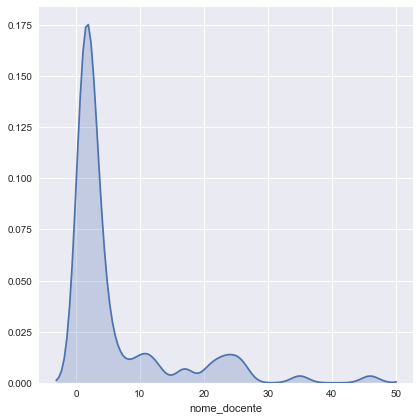

In [29]:


#to switch to seaborn defaults, simply call the set() function.
sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
sns.set_context("notebook")


# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(var, size=6)

# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "nome_docente", shade=True)

# Plot the graph
plt.show()
    
 